In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt
import random
%matplotlib inline
random.seed(1)

Созданим само бета распределение и выборку из него с n = 1000

In [13]:
a, b = 0.3, 0.7
beta_rv = stats.beta(a,b)
sample_beta = beta_rv.rvs(1000)

Построем сглаженную функцию плотности для выборки (KDE), теоретическую плотность для данного распределения и гистограмму.

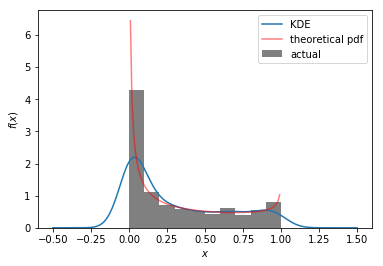

In [14]:
x = np.linspace(0,1,100)
pdf = beta_rv.pdf(x)

df = pd.DataFrame(sample_beta, columns=['KDE'])
ax = df.plot(kind='density')

plt.plot(x, pdf, label='theoretical pdf',c='r',alpha=0.5)
plt.hist(sample_beta,normed=True,color='grey',label='actual')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Рассчитаем эти параметры, чтобы сравнивать получаемые опытным путем параметры с правилами центральной предельной теоремы.

In [15]:
MU = a/(a+b)
VAR = (a*b)/(((a+b)**2)*(a+b+1))
SIGMA = sqrt(VAR)
MU, SIGMA

(0.3, 0.324037034920393)

Функция для генерации выборок и подсчета выборочных средних. С теоретическими и приближенными значения параметров, а так же графиками теоретического нормального распределения.

In [20]:
def clt(sample,sub_sample_size,n_sub_samples=1000):
    means = []
    for i in range(n_sub_samples):
        sub_sample = sample[np.random.randint(0,len(sample),sub_sample_size)]
        means.append(np.mean(sub_sample))
        
    mu = np.mean(means)
    sigma = np.std(means,ddof=1)
    SE = SIGMA/sqrt(sub_sample_size) # стандартная ошибка среднего
    
    norm_rv = stats.norm(MU,SE)
    
    print 'Теоретическое среднее vs приближенное: {:.2f} vs {:.2f}'.format(MU,mu)
    print 'Теоретическое стандартное откл. vs приближенное: {:.2f} vs {:.2f}'.format(SE,sigma)
    print 'Приближенное среднее 95% доверительный интервал = {:.2f} +/- {:.2f}'.format(mu,2*SE)
    
    plt.hist(means,normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

Теоретическое среднее vs приближенное: 0.30 vs 0.31
Теоретическое стандартное откл. vs приближенное: 0.14 vs 0.15
Приближенное среднее 95% доверительный интервал = 0.31 +/- 0.29


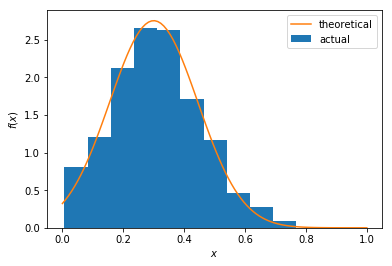

In [21]:
clt(sample_beta,5)

Теоретическое среднее vs приближенное: 0.30 vs 0.30
Теоретическое стандартное откл. vs приближенное: 0.10 vs 0.10
Приближенное среднее 95% доверительный интервал = 0.30 +/- 0.20


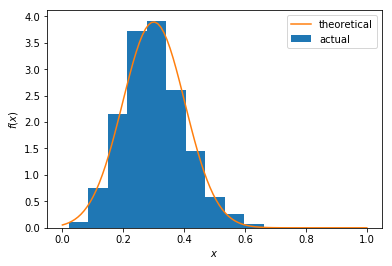

In [22]:
clt(sample_beta,10)

Теоретическое среднее vs приближенное: 0.30 vs 0.30
Теоретическое стандартное откл. vs приближенное: 0.05 vs 0.05
Приближенное среднее 95% доверительный интервал = 0.30 +/- 0.09


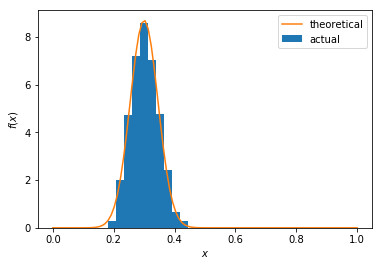

In [23]:
clt(sample_beta,50)

По результатам задания делаем вывод о том, что точность аппроксимации распределения выборочных средних нормальным распределением возрастает с ростом n.